In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,6)
 
df=pd.read_csv('driver_data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
id                      4000 non-null int64
mean_dist_day           4000 non-null float64
mean_over_speed_perc    4000 non-null int64
dtypes: float64(1), int64(2)
memory usage: 93.8 KB


,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [11]:
from sklearn.cluster import KMeans
#Taking 2 clusters
kmeans=KMeans(n_clusters=2)
df_analyze=df.drop('id',axis=1)
kmeans.fit(df_analyze)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [14]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [15]:
print(type(kmeans.labels_))
unique,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


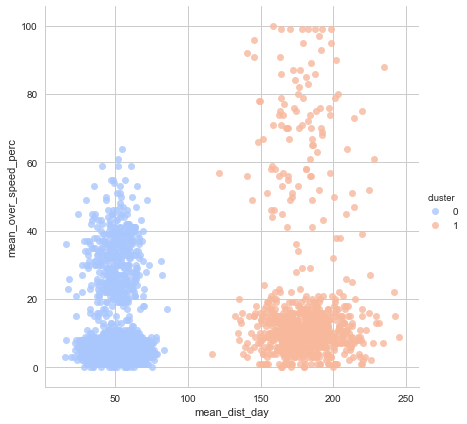

In [19]:
df_analyze['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze,hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [22]:
#Checking the clusters at n=4
kmeans_4=KMeans(n_clusters=4)
kmeans_4.fit(df.drop('id',axis=1))
kmeans_4.fit(df.drop('id',axis=1))
print(kmeans_4.cluster_centers_)
unique,counts=np.unique(kmeans_4.labels_,return_counts=True)
kmeans_4.cluster_centers_
print(dict(zip(unique,counts)))

[[ 49.98428468   5.21441441]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]
 [ 50.46127059  32.42823529]]
{0: 2775, 1: 696, 2: 104, 3: 425}


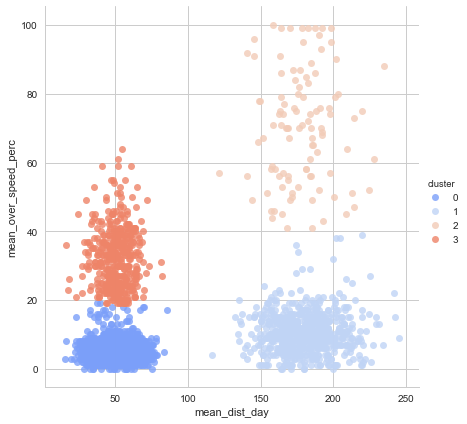

In [23]:
df_analyze['cluster']=kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze,hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)